This page has been moved to [https://econ.pages.code.wm.edu/414/syllabus/docs/index.html](https://econ.pages.code.wm.edu/407/notes/docs/index.html) and is no longer being maintained here.

In [1]:
%matplotlib inline
from IPython.display import YouTubeVideo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import gamma
from scipy.stats import uniform
import statsmodels.formula.api as smf  

np.random.seed(12578)

## Frequentists Statistics

The statsmodels package has some of the functionality of stata.  It can estimate most models you would see as a student taking econometrics, time series, and cross section here at William and Mary.  Here is an example OLS regression:

In [2]:
# load data and create dataframe
tobias_koop=pd.read_csv('https://rlhick.people.wm.edu/econ407/data/tobias_koop_t_4.csv')

tobias_koop.head()

id  educ  ln_wage  pexp  time  ability  meduc  feduc  broken_home  \
0   4    12     2.14     2     4     0.26     12     10            1   
1   6    15     1.91     4     4     0.44     12     16            0   
2   8    13     2.32     8     4     0.51     12     15            1   
3  11    14     1.64     1     4     1.82     16     17            1   
4  12    13     2.16     6     4    -1.30     13     12            0   

   siblings  pexp2  
0         4      4  
1         2     16  
2         2     64  
3         2      1  
4         5     36

Note that statsmodels works seemlessly with Pandas dataframes (tobias_koop).

In [3]:
formula = "ln_wage ~ educ + pexp + pexp2 + broken_home"
results = smf.ols(formula,tobias_koop).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     51.36
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           1.83e-39
Time:                        15:39:05   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.137      3.353      

Note that the results object contains the other types of information (including robust standard errors).  

In [4]:
results.HC0_se

Intercept      0.131223
educ           0.009905
pexp           0.022629
pexp2          0.002239
broken_home    0.031162
dtype: float64

If you want to specify which variance covariance matrix to use, use the `cov_type` argument.

In [5]:
results = smf.ols(formula,tobias_koop).fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                ln_wage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.163
Method:                 Least Squares   F-statistic:                     65.13
Date:                Mon, 12 Mar 2018   Prob (F-statistic):           3.89e-49
Time:                        15:39:05   Log-Likelihood:                -583.66
No. Observations:                1034   AIC:                             1177.
Df Residuals:                    1029   BIC:                             1202.
Df Model:                           4                                         
Covariance Type:                  HC0                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.4603      0.131      3.508      

/home/robhicks/anaconda/envs/python36/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Statistical Distributions

In the course, we will be evaluating cdf and pdf's, building likelihood and log-likelihood functions, taking random samples and perhaps other statistical operations.  We will primarily use the `scipy` family of distributions.  At times, I may "slip-up" and use some `numpy` functions, but in my opinion the `scipy` functions are more powerful by saving time coding.  Here are some examples:

### Evaluating pdf's and cdf's:

In [6]:
mean = 0
y = 1.5
std = 1
print("PDF value") 
print(norm(mean,std).pdf(y))
print("CDF value")
print(norm(mean,std).cdf(y))

PDF value
0.12951759566589174
CDF value
0.9331927987311419


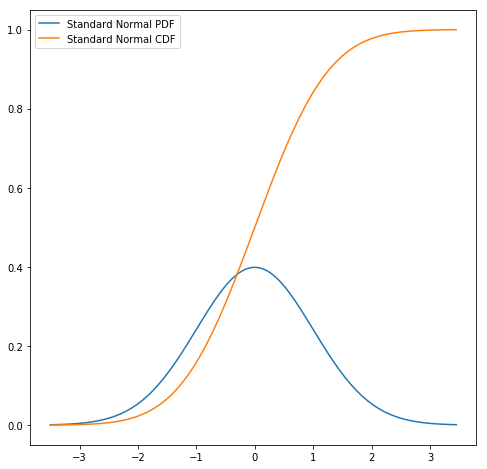

In [7]:
# use these for some plots
y = np.arange(-3.5,3.5,.05)

pdf_cdf_values = np.zeros((y.shape[0],3))

row_index=0
for i in y:
    pdf_cdf_values[row_index,0] = i
    pdf_cdf_values[row_index,1] = norm(mean,std).pdf(i)
    pdf_cdf_values[row_index,2] = norm(mean,std).cdf(i)
    row_index+=1
    
plt.figure(figsize=(8,8))
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,1],label="Standard Normal PDF")
plt.plot(pdf_cdf_values[:,0],pdf_cdf_values[:,2],label="Standard Normal CDF")
plt.legend(loc='upper left')
plt.show()

### Random Variates

Let's draw some random numbers from the normal distribution.  This time, instead of using mean 0 and standard deviation of 1, let's assume the distribution is centered at 10 with a standard deviation of 2.  Draw 100 random variates:

In [8]:
mean = 10
std = 2
N = 100
y = norm(mean,std).rvs(N)
print(y)

[10.41686472  6.72611306  9.20348461 11.67079106 14.15377413  9.78287809
  9.83408784  7.83980489  6.21018425 12.23916019  9.45461662 10.63889929
  6.58849774  9.96389407  7.96884601 10.42344446  9.45020002 12.93908039
 10.11263851  7.98512175 11.87855743  8.42314993  9.09156988 10.90302077
  7.3771751   7.03648814 10.54189927 14.09773549  9.19448907 12.93931697
 10.49027688  9.22235715  5.73973794 11.20407959  9.82559841  8.78135374
  5.69799647 13.62382972  8.26666461 11.31502973  9.24674708  9.09477411
 12.31188227 11.20571449 12.89555143 10.90910426 12.65193488 10.73500682
  9.1105223  12.11264092  9.56369209 11.47744907  9.81428745  8.91313828
 11.91558726  8.0820239   7.91563515 11.06442387  5.56267745  6.09232808
 10.34458283  6.64327682  7.85285525  7.73673878  9.12125366  7.71302735
  9.56898416  8.09889655  9.40693208 12.77956292 13.20303638 10.8201574
 10.30760335 11.8707502  12.27990302  9.86902746  6.13998553  9.44624862
 10.44409674  9.52436141  9.05273226 12.713509   10.

To convince ourselves, we have decent random numbers, let's view a histogram:

9.777465558583781
2.037619083453264


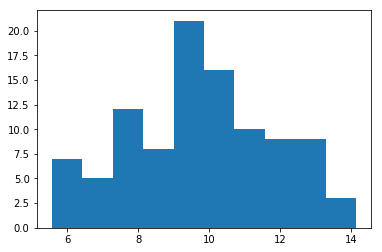

In [9]:
print(np.mean(y))
print(np.std(y))
plt.hist(y,bins=10)
plt.show()

Jury is still out on that distribution.  But with $N=100$, it is a small sample.

### Likelihood functions

Suppose the values y are observed and we want to calculate the likelihood of y given a mean for each of the 100 observations in y.  Even though we know the mean above should be 10, let's calculate the likelihood of y given a mean of 10.3 and a standard deviation of 2 assuming y is distributed normal.  Note these are simply pdf values for each datapoint:

$$
\mathcal{L}_i(y_i|\mu,\sigma) = \frac{1}{\sigma \sqrt{2\pi}}e^{\frac{(y_i - \mu)^2}{2\sigma^2}}
$$

In [10]:
norm(10.3,2).pdf(y)

array([0.1991309 , 0.04041036, 0.17163606, 0.15771444, 0.03116273,
       0.19291365, 0.19413141, 0.09360648, 0.02465169, 0.12466458,
       0.18242433, 0.19662787, 0.03565051, 0.19667422, 0.10112776,
       0.19909155, 0.18225368, 0.08351919, 0.19859777, 0.10208818,
       0.14608507, 0.12842548, 0.16618999, 0.1906073 , 0.06856666,
       0.05268632, 0.19801745, 0.03287854, 0.17121161, 0.08350615,
       0.19857044, 0.17251864, 0.01482286, 0.18009772, 0.19393779,
       0.14951306, 0.01413092, 0.05013348, 0.118969  , 0.17536752,
       0.17364307, 0.16635073, 0.12026658, 0.18003112, 0.0859322 ,
       0.19043169, 0.09990501, 0.19480824, 0.16713676, 0.13228533,
       0.18640112, 0.16773264, 0.19367471, 0.15684317, 0.14394111,
       0.1078501 , 0.09800516, 0.18542057, 0.012066  , 0.02181519,
       0.19942159, 0.03749533, 0.09435883, 0.08774028, 0.16766856,
       0.0864111 , 0.18658214, 0.10885999, 0.18054378, 0.0924937 ,
       0.0695619 , 0.19283774, 0.1994697 , 0.14653474, 0.12220

We can also easily calculate the joint likelihood. This is

$$
\mathcal{L}(\mathbf{y}|\mu) = \prod_{i \in N}\mathcal{L}_i(y_i|\mu,\sigma)
$$

In [11]:
norm(10.3,2).pdf(y).prod()

9.256632406264856e-95

For computational advantages, we usually, work with log likelihoods, noting that

$$
ln(\mathcal{L}(\mathbf{y}|\mu)) = \sum_{i \in N}ln(\mathcal{L}_i(y_i|\mu,\sigma))
$$

Implemented in code for our vector $\mathbf{y}$:

In [12]:
norm(10.3,2).logpdf(y).sum()

-216.52024352295027

Let's visualize why the log-likelihood is better to work with than the likelihood:

In [13]:
mu_candidate = np.arange(7,13,.2) # plot likelihood and log-likelihood in this range

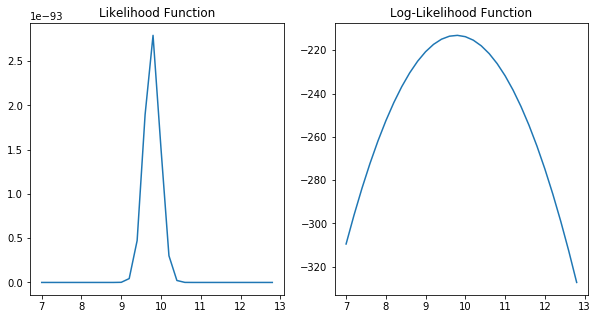

In [14]:
like_loglike_values = np.zeros((mu_candidate.shape[0],3))

row_index=0
for i in mu_candidate:
    like_loglike_values[row_index,0] = i
    like_loglike_values[row_index,1] = norm(i,2).pdf(y).prod()
    like_loglike_values[row_index,2] = norm(i,2).logpdf(y).sum()
    row_index+=1

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('Likelihood Function')
plt.plot(like_loglike_values[:,0],like_loglike_values[:,1],label="Likelihood Function")
plt.subplot(122)
plt.plot(like_loglike_values[:,0],like_loglike_values[:,2],label="Log-Likelihood Function")
plt.title('Log-Likelihood Function')
plt.show()